In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read the csv file
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
# Check the dataframe information
admission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1000 non-null   int64  
 1   TOEFL Score        1000 non-null   int64  
 2   University Rating  1000 non-null   int64  
 3   SOP                1000 non-null   float64
 4   LOR                1000 non-null   float64
 5   CGPA               1000 non-null   float64
 6   Research           1000 non-null   int64  
 7   Chance of Admit    1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [5]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.192000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.078823,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [6]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [7]:
admission_df[admission_df['Chance of Admit']>0.82].groupby('Chance of Admit').mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,
0.83,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

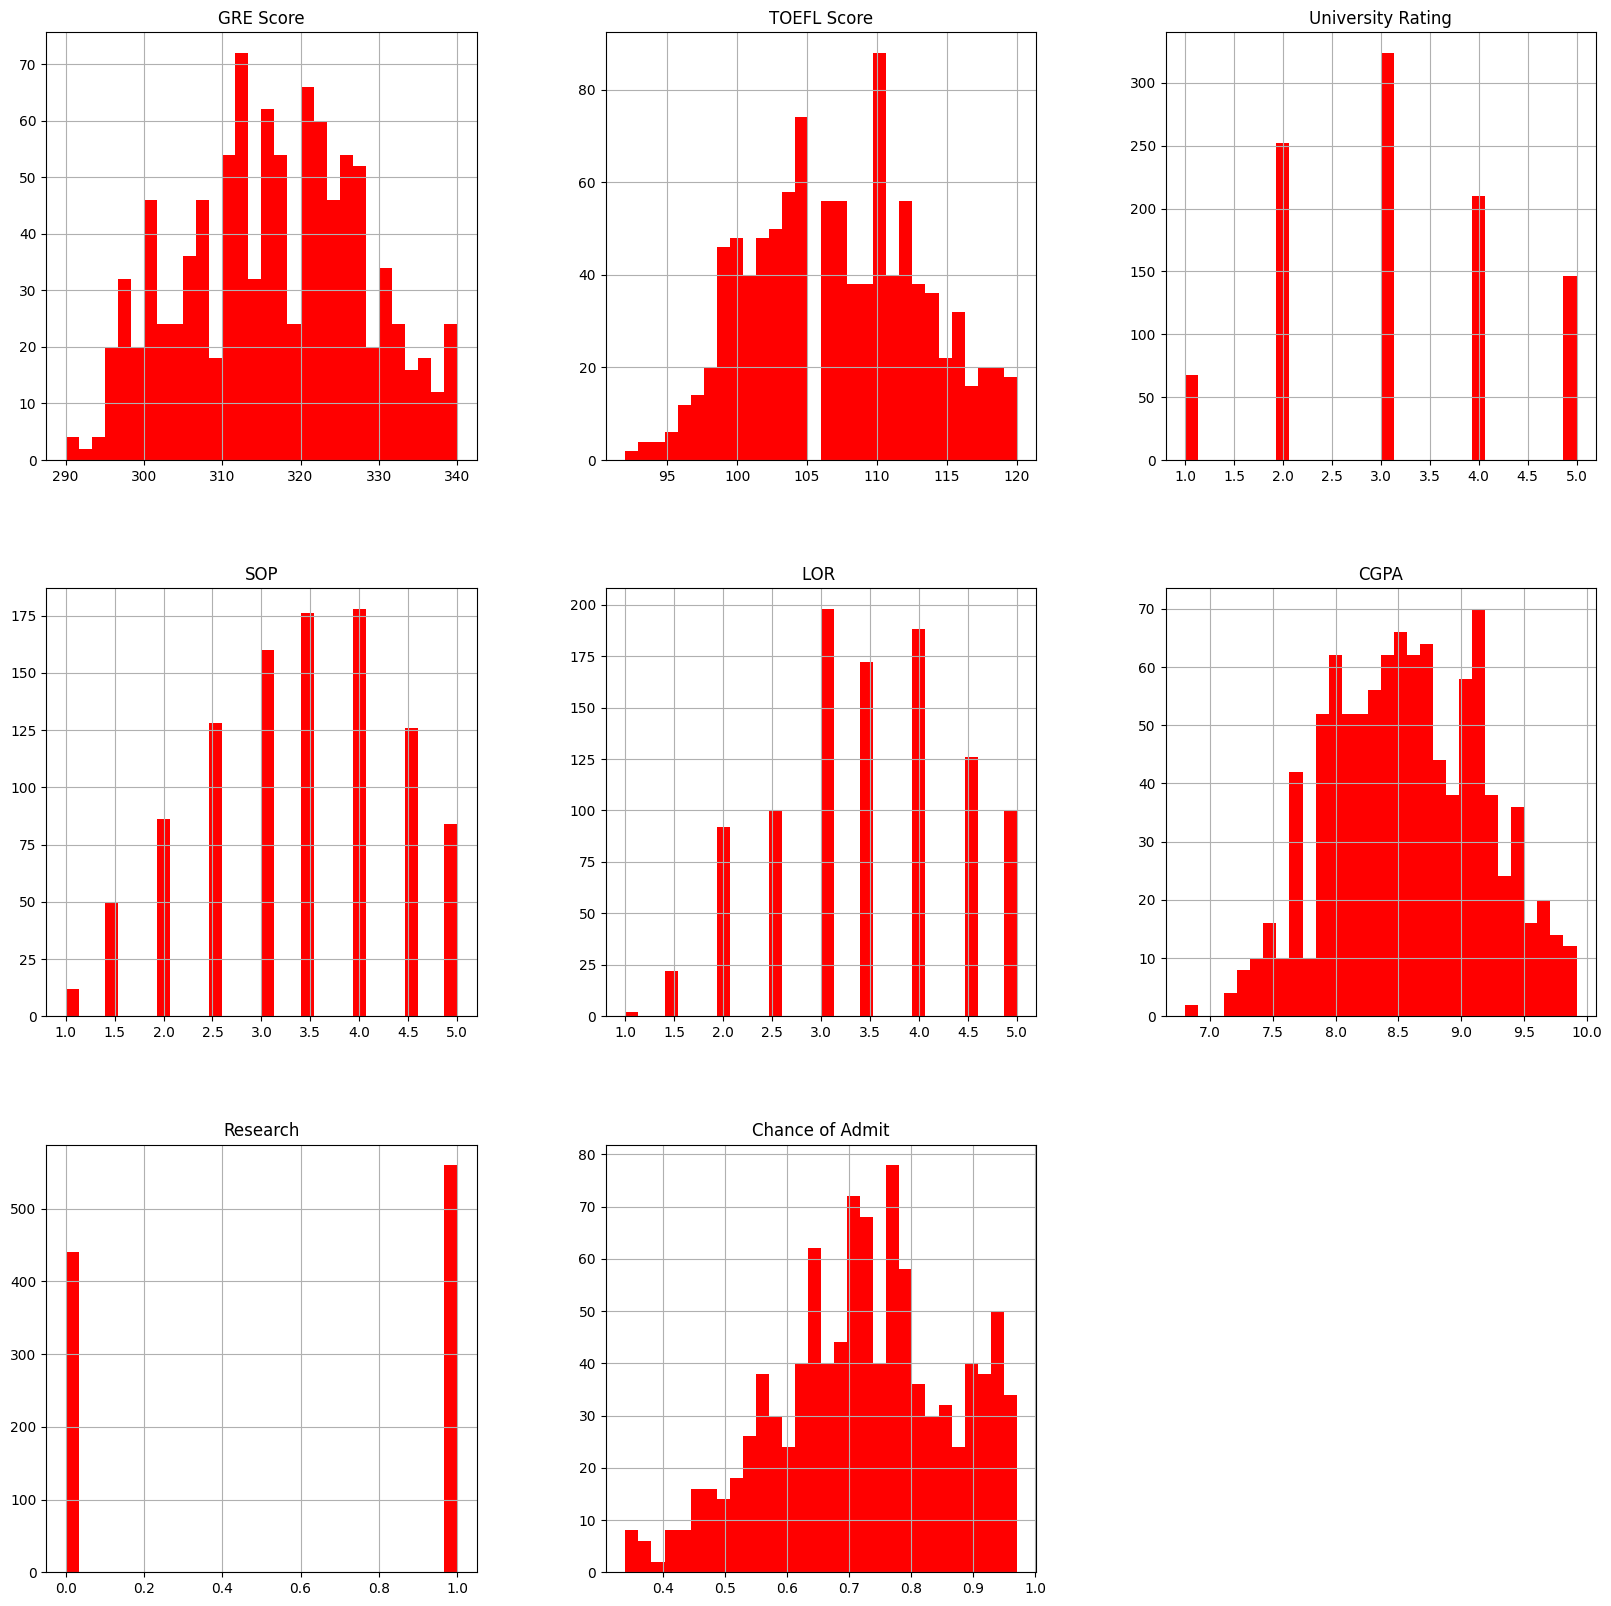

In [8]:
admission_df.hist(bins = 30, figsize = (20, 20), color='r')

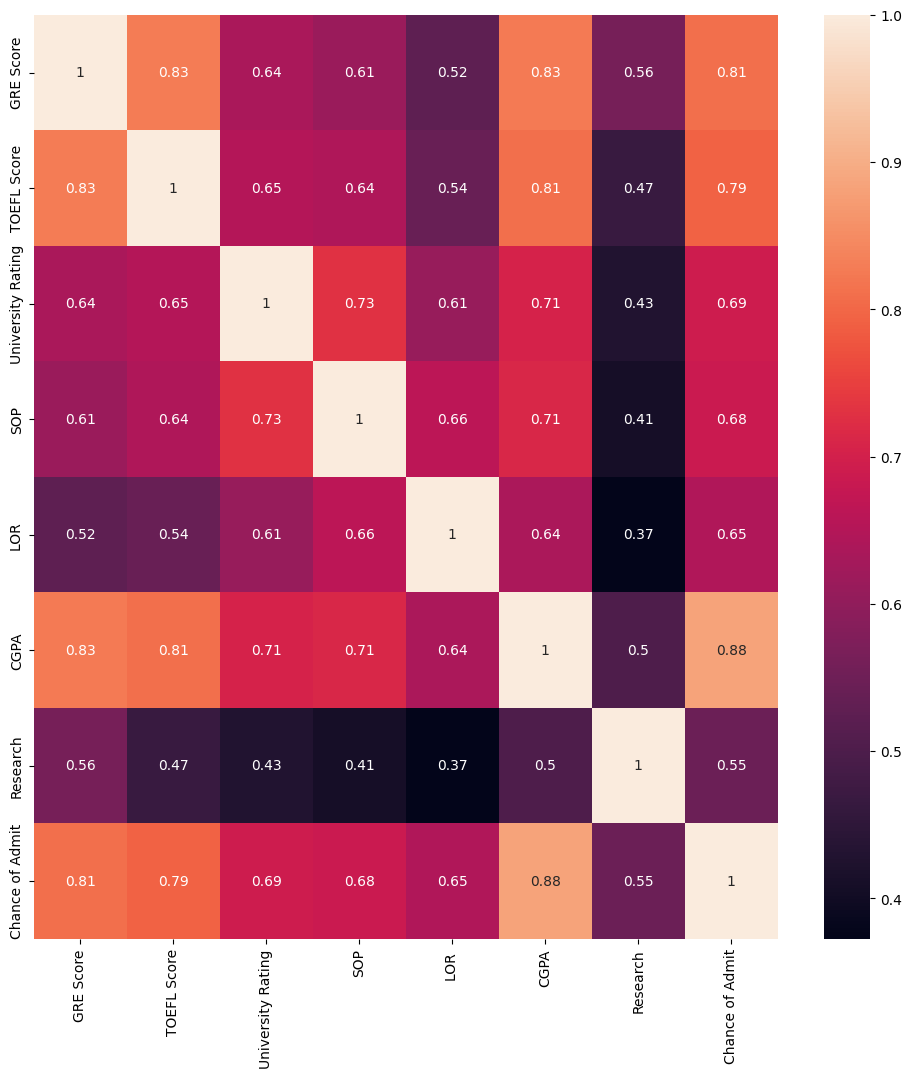

In [9]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

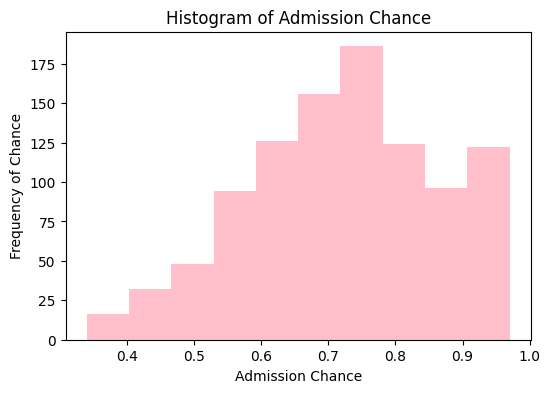

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(admission_df['Chance of Admit'],bins=10,color="pink")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

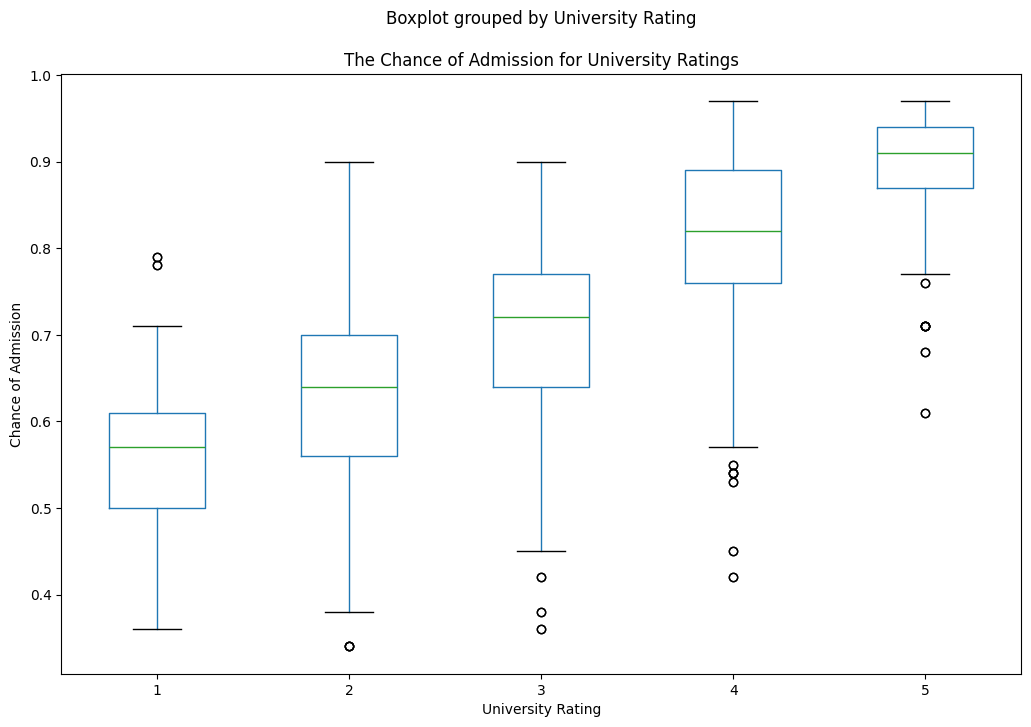

In [11]:
admission_df.boxplot(column='Chance of Admit',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

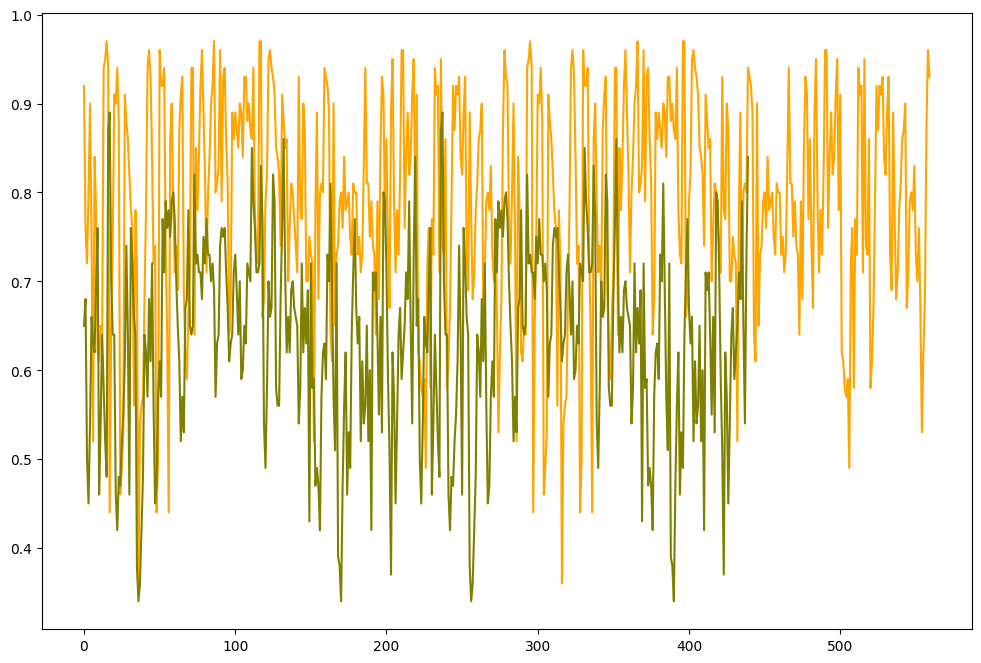

In [12]:
plt.figure(figsize=(12,8))
plt.plot(range(len(admission_df[admission_df['Research']==1])), admission_df[admission_df['Research']==1]['Chance of Admit'], color='orange')
plt.plot(range(len(admission_df[admission_df['Research']==0])), admission_df[admission_df['Research']==0]['Chance of Admit'], color='olive')
plt.show()

In [13]:
admission_df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
X = admission_df.drop(columns=['Chance of Admit'])
y = admission_df['Chance of Admit']

In [15]:
X.shape

(1000, 7)

In [16]:
y.shape

(1000,)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
y = y.reshape(-1,1)

In [19]:
y.shape

(1000, 1)

In [20]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [21]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [22]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [24]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
accuracy_LinearRegression = linear_regression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7963904506196284

In [26]:
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_decisionTree

0.8808673684557695

In [28]:
y_pred = linear_regression_model.predict(X_test)


In [29]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

In [30]:
k = X_test.shape[1]
n = len(X_test)
n

200

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.068 
MSE = 0.004568423600142413 
MAE = 0.04718474633186011 
R2 = 0.7963904506196284 
Adjusted R2 = 0.788967185798469


In [32]:
import pickle


In [33]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)


(7,)
(1, 7)


In [34]:
pickle.dump(linear_regression_model, open('linear_regression_model_sc.pkl', 'wb'))

In [35]:
model = pickle.load(open('linear_regression_model_sc.pkl', 'rb'))
print(model.predict(s))


[[62.51835974]]


In [36]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)


(7,)
(1, 7)


In [37]:
pickle.dump(decisionTree_model, open('decisionTree_model_sc.pkl', 'wb'))

In [38]:
model = pickle.load(open('decisionTree_model_sc.pkl', 'rb'))
print(model.predict(s))


[1.7607193]


In [39]:
import numpy as np
cy_train=[1 if chance > 0.53 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.53 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [40]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(X_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(X_test)))



Logistic regression accuracy: 0.915
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       142
           1       0.81      0.93      0.86        58

    accuracy                           0.92       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.92      0.92       200



In [41]:
pickle.dump(lr, open('logistic_regression_model_sc.pkl', 'wb'))

In [42]:
model = pickle.load(open('logistic_regression_model_sc.pkl', 'rb'))
print(model.predict(s))


[1]
